## Loading ASE-related python environments

In [ ]:
from ase.io import read,write
from ase.visualize import view

## Load model.xyz for visualization 

in this example we provide a platinum slab model consistent with Chem. 6, 011310 (2025), https://doi.org/10.1063/5.0259061

In [ ]:
Pt_slab=read('/opt/GPUMD/examples/23/model.xyz')
view(Pt_slab)

<Popen: returncode: None args: ['d:\\APP\\anaconda3\\envs\\MDana\\python.exe...>

## Prepare the input files

cp Reconstruction_bak Reconstruction

cd Reconstruction

note: The training/test data and training parameters for nep.txt in this example can be found at https://zenodo.org/records/14647737.


## Submit the job
sbatch gpumd.sh 

10 ns NVT simulation of 51,200 atoms on an Nvidia RTX 4090 GPU in 3.8 hours

## Plot the thermo.out

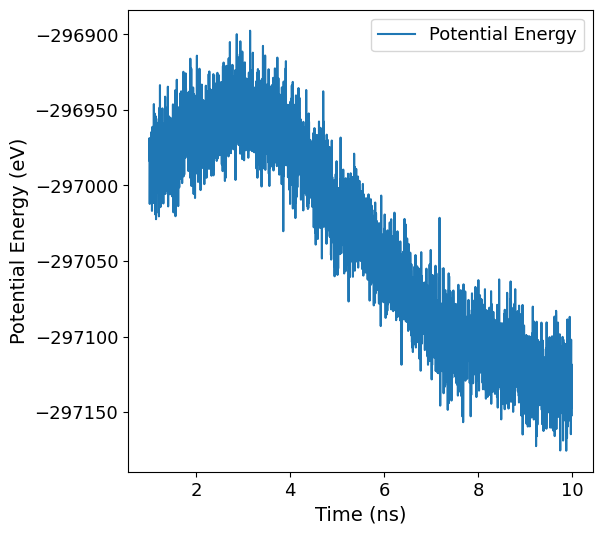

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''
column   1 2 3 4  5  6  7   8   9   10 11 12
quantity T K U Px Py Pz Pyz Pxz Pxy Lx Ly Lz
'''

# Load the data from the thermo.out file
thermo = np.loadtxt('/opt/GPUMD/examples/23/Reconstruction/thermo.out')
PE = thermo[:, 2]

# thermo output interval is 1000 steps, and the time step is 2 fs
# so the time interval is 0.002 ns
time = np.arange(len(thermo)) * 0.002  # in ns

# Filter data for time > 1 ns
time_filtered = time[time > 1.0]
PE_filtered = PE[time > 1.0]

# Plot the potential energy profile for time > 1 ns
plt.figure(figsize=(6, 6))
plt.plot(time_filtered, PE_filtered,label='Potential Energy')
plt.xlabel('Time (ns)', fontsize=14)
plt.ylabel('Potential Energy (eV)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()